In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('C:/Users/joshc/Documents/NSS/python/projects/un_data-joshcb88/data/gdp_percapita.csv')
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


##How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


##Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [4]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])
gdp_df.columns
gdp_df.columns=['Country','Year','GDP_Per_Capita']
gdp_df.head()


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


##How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [5]:
country=gdp_df['Year']
country.value_counts().info()

<class 'pandas.core.series.Series'>
Int64Index: 31 entries, 2018 to 1990
Series name: Year
Non-Null Count  Dtype
--------------  -----
31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [6]:
countries_gdp_count=gdp_df.Country.value_counts().to_frame()
countries_gdp_count

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10
Somalia,8


In [7]:
countries_gdp_count=countries_gdp_count.reset_index()
countries_gdp_count

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [8]:
countries_gdp_count.columns = ['Country', 'Num_Years']
countries_gdp_count.head()

,Country,Num_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31


In [9]:
countries_all_years= countries_gdp_count.query('Num_Years==31')
countries_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    205 non-null    object
 1   Num_Years  205 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [10]:
countries_not_all_years= countries_gdp_count.query('Num_Years<31')
countries_not_all_years

,Country,Num_Years
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


##In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
gdp_df_2020=gdp_df.loc[gdp_df['Year'] == 2020]
gdp_df_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


C:\Users\joshc\AppData\Local\Temp\ipykernel_26952\4189653390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=gdp_df_2020["GDP_Per_Capita"], hist=True, kde=False, rug=False )


<Axes: xlabel='GDP_Per_Capita'>

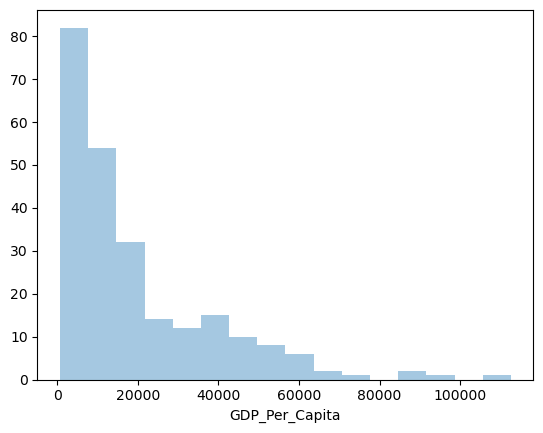

In [12]:
sns.distplot( a=gdp_df_2020["GDP_Per_Capita"], hist=True, kde=False, rug=False )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

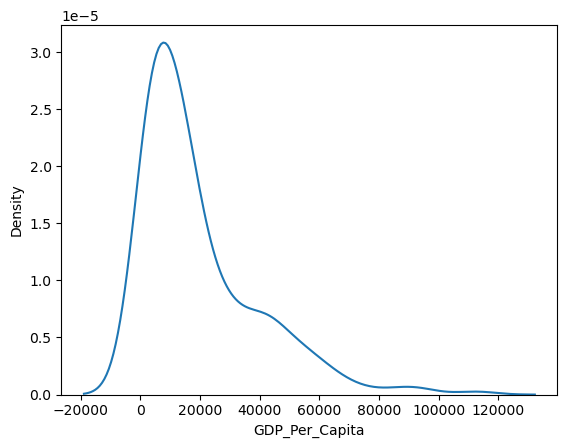

In [13]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

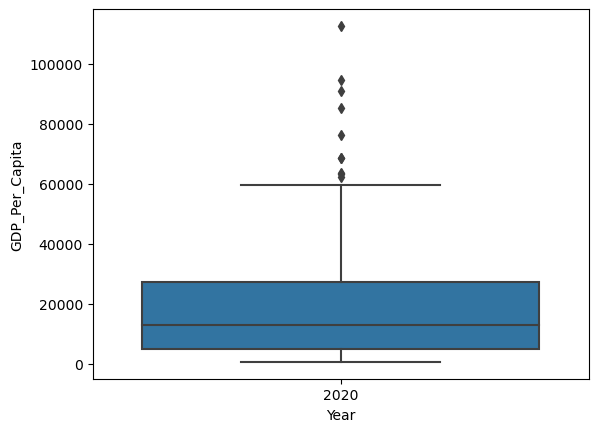

In [14]:
sns.boxplot( x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

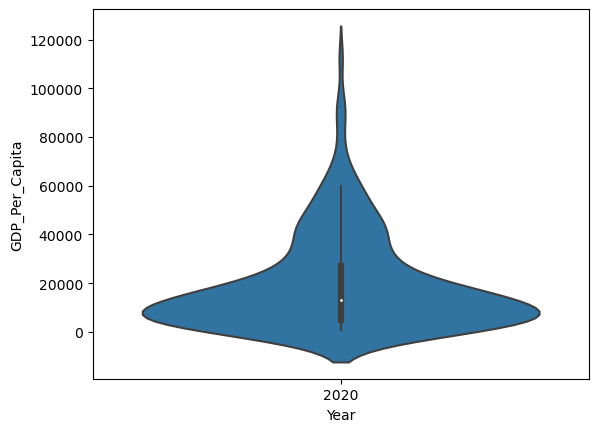

In [15]:
sns.violinplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"])

##What was the median GDP per capita value in 2020?

In [16]:
gdp_df_2020['GDP_Per_Capita'].median()

12908.9374056206

##For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [18]:
gdp_1990=gdp_df.loc[gdp_df['Year']==1990]
gdp_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [19]:
gdp_2000=gdp_df.loc[gdp_df['Year']==2000]
gdp_2000

,Country,Year,GDP_Per_Capita
39,Africa Eastern and Southern,2000,2915.472987
70,Africa Western and Central,2000,2690.555839
101,Albania,2000,5892.590548
132,Algeria,2000,8710.444074
163,Angola,2000,4707.954625
...,...,...,...
7045,Vietnam,2000,3649.242659
7076,West Bank and Gaza,2000,4503.248860
7103,World,2000,11140.090244
7134,Zambia,2000,1990.858991


In [20]:
gdp_2010=gdp_df.loc[gdp_df['Year']==2010]
gdp_2010

,Country,Year,GDP_Per_Capita
10,Afghanistan,2010,1957.029070
29,Africa Eastern and Southern,2010,3545.205203
60,Africa Western and Central,2010,3794.179490
91,Albania,2010,10749.481671
122,Algeria,2010,10970.692420
...,...,...,...
7035,Vietnam,2010,6285.144918
7066,West Bank and Gaza,2010,5411.066482
7093,World,2010,13964.866191
7124,Zambia,2010,3125.528849


In [34]:
gdp_decades = pd.concat([gdp_1990, gdp_2000,gdp_2010,gdp_df_2020])
gdp_decades

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [32]:
type(gdp_decades)

pandas.core.frame.DataFrame

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

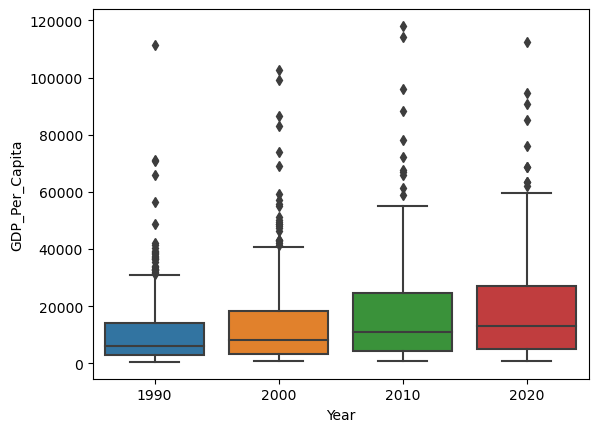

In [36]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

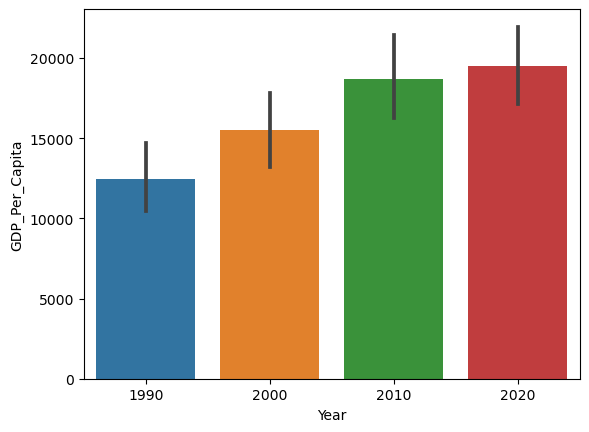

In [38]:
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

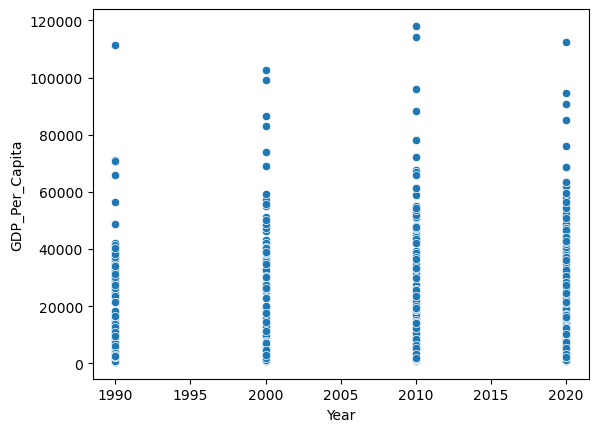

In [47]:
sns.scatterplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

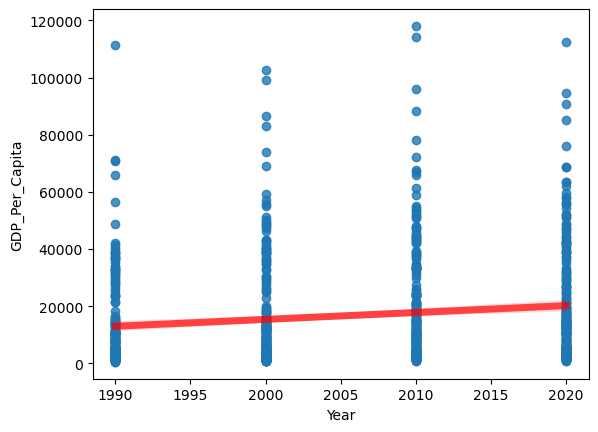

In [51]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})

##Which country was the first to have a GDP per capita greater than $100,000?